<a href="https://colab.research.google.com/github/maverick2903/SEM6_Programs/blob/main/ML/BackpropagationFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 1
Output at Hidden Layer:
 [0.78766405 0.66225689]
Output at Output Layer:
 [0.80641313]
Error at Hidden Layer:
 [[ 0.78766405  0.66225689]
 [-0.21233595 -0.33774311]
 [-0.21233595 -0.33774311]
 [ 0.78766405  0.66225689]]
Error at Output Layer:
 [[ 0.80641313]
 [-0.19358687]
 [-0.19358687]
 [ 0.80641313]]
Weights Input-Hidden:
 [[0.07203857 0.2557392 ]
 [0.87561414 0.38419131]]
Weights Hidden-Output:
 [[0.1216148 ]
 [0.63599423]]
Hidden Bias:
 [0.36317185 0.0328995 ]
Output Bias:
 [0.90729456]
Total Error: 0.33764686879248945
-----------------------------

Epoch: 11
Output at Hidden Layer:
 [0.78753161 0.66104623]
Output at Output Layer:
 [0.800454]
Error at Hidden Layer:
 [[ 0.78753161  0.66104623]
 [-0.21246839 -0.33895377]
 [-0.21246839 -0.33895377]
 [ 0.78753161  0.66104623]]
Error at Output Layer:
 [[ 0.800454]
 [-0.199546]
 [-0.199546]
 [ 0.800454]]
Weights Input-Hidden:
 [[0.07188885 0.25448231]
 [0.87543497 0.38289542]]
Weights Hidden-Output:
 [[0.10843904]
 [0.62481171]

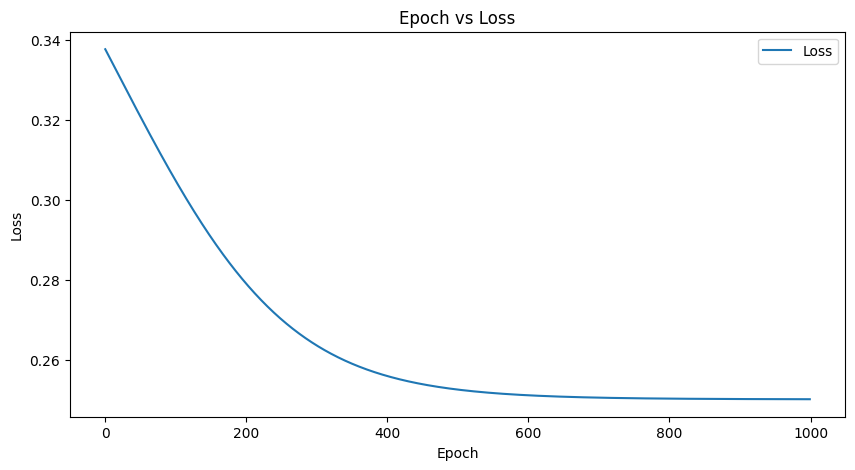

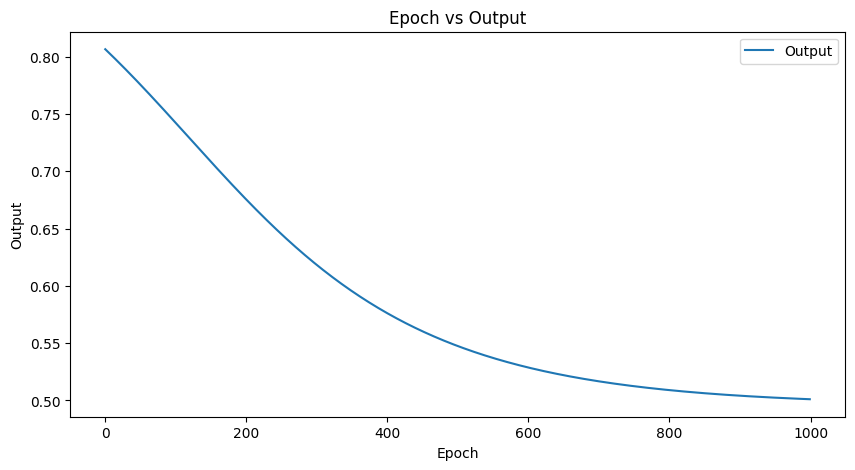

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class FeedForwardNetwork:
    def __init__(self, ni, nhidden, nout):
        self.ni = ni
        self.nhidden = nhidden
        self.nout = nout
        self.weights_input_to_hidden = np.random.rand(ni, nhidden)
        self.weights_hidden_to_output = np.random.rand(nhidden, nout)
        self.hidden_bias = np.random.rand(nhidden)
        self.output_bias = np.random.rand(nout)
        self.losses = []
        self.hidden_outputs = []
        self.outputs = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, inputs):
        #Standard calculation of dot product plus bias
        hidden_input = np.dot(inputs, self.weights_input_to_hidden) + self.hidden_bias
        #Pass through activation function
        hidden_output = self.sigmoid(hidden_input)
        #Pass hidden output into final output layer to get final output values
        output_input = np.dot(hidden_output, self.weights_hidden_to_output) + self.output_bias
        output = self.sigmoid(output_input)
        return output, hidden_output

    def back_propagation(self, inputs, target, output, hidden_output, learning_rate):
        #Initial error
        output_error = target - output
        #Using do and dh formulae
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.weights_hidden_to_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

        #Updating the weights and bias
        self.weights_hidden_to_output += learning_rate * np.dot(hidden_output.reshape(-1,1), output_delta.reshape(1,-1))
        self.weights_input_to_hidden += learning_rate * np.dot(inputs.reshape(-1,1), hidden_delta.reshape(1,-1))
        self.output_bias += learning_rate * output_delta
        self.hidden_bias += learning_rate * hidden_delta

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            epoch_losses = []
            epoch_hidden_outputs = []
            epoch_outputs = []
            epoch_hidden_errors = []
            epoch_output_errors = []
            for i in range(len(inputs)):
              #For each X input, compute forward propagation process from input, to hidden to output
                output, hidden_output = self.forward_propagation(inputs[i])
                #Pass these outputs into back prop algo to get weight change values
                self.back_propagation(inputs[i], targets[i], output, hidden_output, learning_rate)

            total_error = np.mean(np.square(targets - self.forward_propagation(inputs)[0]))
            epoch_losses.append(total_error)
            epoch_hidden_outputs.append(hidden_output)
            epoch_outputs.append(output)
            epoch_hidden_errors.append(hidden_output - targets)
            epoch_output_errors.append(output - targets)

            self.losses.append(np.mean(epoch_losses))
            self.hidden_outputs.append(np.mean(epoch_hidden_outputs, axis=0))
            self.outputs.append(np.mean(epoch_outputs, axis=0))

            if epoch % 10 == 0 or epoch == 999:
              print("Epoch:", epoch+1)
              print("Output at Hidden Layer:\n", hidden_output)
              print("Output at Output Layer:\n", output)
              print("Error at Hidden Layer:\n", hidden_output - targets)
              print("Error at Output Layer:\n", output - targets)
              print("Weights Input-Hidden:\n", self.weights_input_to_hidden)
              print("Weights Hidden-Output:\n", self.weights_hidden_to_output)
              print("Hidden Bias:\n", self.hidden_bias)
              print("Output Bias:\n", self.output_bias)
              print("Total Error:", total_error)
              print("-----------------------------")
              print()

        self.plot_results(epochs)

    def plot_results(self, epochs):
        epochs_range = range(epochs)

        # Plot Loss
        plt.figure(figsize=(10, 5))
        plt.plot(epochs_range, self.losses, label='Loss')
        plt.title('Epoch vs Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Plot Output
        plt.figure(figsize=(10, 5))
        plt.plot(epochs_range, self.outputs, label='Output')
        plt.title('Epoch vs Output')
        plt.xlabel('Epoch')
        plt.ylabel('Output')
        plt.legend()
        plt.show()


ni = 2
nhidden = 2
nout = 1
nn = FeedForwardNetwork(ni, nhidden, nout)

# XOR
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

nn.train(inputs, targets, epochs=1000, learning_rate=0.01)
